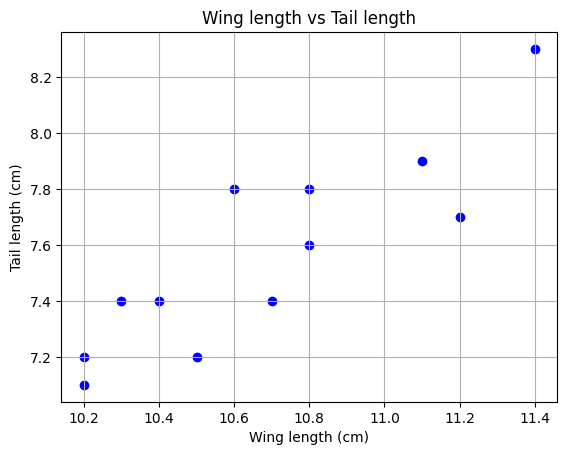

Manual r_xy: 0.8703545613058224
Manual r_yx: 0.8703545613058224
Numpy r_xy: 0.8703545613058227
Numpy r_yx: 0.8703545613058227
Standard error of r: 0.15571863652567386
95% CI for r: (np.float64(0.592311078084478), np.float64(0.9631598602746104))
t statistic: 5.5892767925843225
p-value: 0.00023110594312059085
Significant at p<0.05? True
Test H0: r=0.75
z statistic: 1.08475472717843
p-value: 0.27803030186088407
Power with n = 12 and r=0.5: 0.05323960935131855
Sample size needed for 80% power with r=0.5: [3.]


/usr/local/lib/python3.12/dist-packages/statsmodels/stats/power.py:524: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.power as smp

# Data
wing = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])
n = len(wing)

### 1. Plot X vs Y
plt.scatter(wing, tail, c='blue')
plt.xlabel("Wing length (cm)")
plt.ylabel("Tail length (cm)")
plt.title("Wing length vs Tail length")
plt.grid(True)
plt.show()

### 2. Correlation r_xy and r_yx
# Manual calculation of correlation coefficient
mean_x, mean_y = np.mean(wing), np.mean(tail)
cov_xy = np.sum((wing - mean_x) * (tail - mean_y)) / (n - 1)
std_x, std_y = np.std(wing, ddof=1), np.std(tail, ddof=1)

r_xy_manual = cov_xy / (std_x * std_y)
r_yx_manual = r_xy_manual  # correlation is symmetric

# Using numpy
r_matrix = np.corrcoef(wing, tail)
r_xy_numpy = r_matrix[0, 1]
r_yx_numpy = r_matrix[1, 0]

print("Manual r_xy:", r_xy_manual)
print("Manual r_yx:", r_yx_manual)
print("Numpy r_xy:", r_xy_numpy)
print("Numpy r_yx:", r_yx_numpy)

### 3. Standard error of r_xy and 95% CI
r = r_xy_manual
se_r = np.sqrt((1 - r**2) / (n - 2))  # standard error
z = np.arctanh(r)  # Fisher transformation
se_z = 1 / np.sqrt(n - 3)
z_crit = stats.norm.ppf(0.975)
ci_z = (z - z_crit * se_z, z + z_crit * se_z)
ci_r = (np.tanh(ci_z[0]), np.tanh(ci_z[1]))

print("Standard error of r:", se_r)
print("95% CI for r:", ci_r)

### 4. Significance test of correlation (H0: r = 0)
t_stat = r * np.sqrt((n - 2) / (1 - r**2))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n - 2))
print("t statistic:", t_stat)
print("p-value:", p_value)
print("Significant at p<0.05?", p_value < 0.05)

### 5. Test H0: r = 0.75
r0 = 0.75
# Fisher z test
z_obs = np.arctanh(r)
z_r0 = np.arctanh(r0)
z_diff = (z_obs - z_r0) / se_z
p_value_r0 = 2 * (1 - stats.norm.cdf(abs(z_diff)))

print("Test H0: r=0.75")
print("z statistic:", z_diff)
print("p-value:", p_value_r0)

### 6. Power analysis for rejecting H0: r=0 when true r >= 0.5
effect_size = smp.FTestPower().solve_power  # for correlation, use Cohen's f^2 equivalence
# But better: directly with statsmodels TTestIndPower using r->f conversion
# Cohen's effect size f² = r² / (1 - r²)
r_alt = 0.5
f2 = r_alt**2 / (1 - r_alt**2)

# Power calculation
analysis = smp.FTestPower()
power = analysis.solve_power(effect_size=f2, df_num=1, df_denom=n-2, alpha=0.05)
sample_size = smp.FTestPower().solve_power(effect_size=f2, power=0.8, alpha=0.05, df_num=1)

print("Power with n =", n, "and r=0.5:", power)
print("Sample size needed for 80% power with r=0.5:", sample_size)


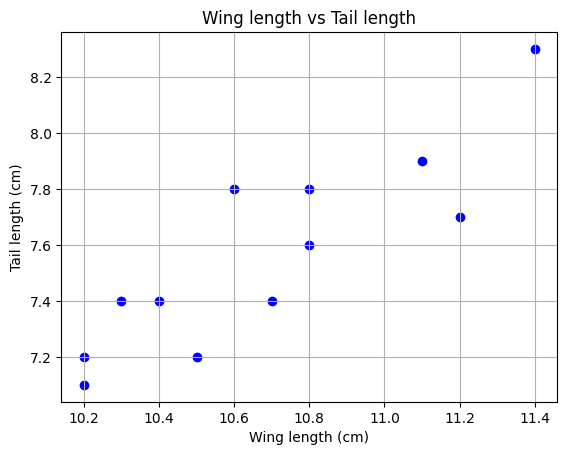

Manual r_xy: 0.8703545613058224
Manual r_yx: 0.8703545613058224
Numpy r_xy: 0.8703545613058227
Numpy r_yx: 0.8703545613058227
Standard error of r: 0.15571863652567386
95% CI for r: (np.float64(0.592311078084478), np.float64(0.9631598602746104))
t statistic: 5.5892767925843225
p-value: 0.00023110594312059085
Significant at p<0.05? True
Test H0: r=0.75
z statistic: 1.08475472717843
p-value: 0.27803030186088407
Power with n = 12 and r=0.5: 0.3789055910287453
Sample size needed for 80% power with r=0.5: 28
Sample size needed for 80% power with r=0.5: 28


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.power as smp

# Data
wing = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])
n = len(wing)

### 1. Plot X vs Y
plt.scatter(wing, tail, c='blue')
plt.xlabel("Wing length (cm)")
plt.ylabel("Tail length (cm)")
plt.title("Wing length vs Tail length")
plt.grid(True)
plt.show()

### 2. Correlation r_xy and r_yx
# Manual calculation of correlation coefficient
mean_x, mean_y = np.mean(wing), np.mean(tail)
cov_xy = np.sum((wing - mean_x) * (tail - mean_y)) / (n - 1)
std_x, std_y = np.std(wing, ddof=1), np.std(tail, ddof=1)

r_xy_manual = cov_xy / (std_x * std_y)
r_yx_manual = r_xy_manual  # correlation is symmetric

# Using numpy
r_matrix = np.corrcoef(wing, tail)
r_xy_numpy = r_matrix[0, 1]
r_yx_numpy = r_matrix[1, 0]

print("Manual r_xy:", r_xy_manual)
print("Manual r_yx:", r_yx_manual)
print("Numpy r_xy:", r_xy_numpy)
print("Numpy r_yx:", r_yx_numpy)

### 3. Standard error of r_xy and 95% CI
r = r_xy_manual
se_r = np.sqrt((1 - r**2) / (n - 2))  # standard error
z = np.arctanh(r)  # Fisher transformation
se_z = 1 / np.sqrt(n - 3)
z_crit = stats.norm.ppf(0.975)
ci_z = (z - z_crit * se_z, z + z_crit * se_z)
ci_r = (np.tanh(ci_z[0]), np.tanh(ci_z[1]))

print("Standard error of r:", se_r)
print("95% CI for r:", ci_r)

### 4. Significance test of correlation (H0: r = 0)
t_stat = r * np.sqrt((n - 2) / (1 - r**2))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n - 2))
print("t statistic:", t_stat)
print("p-value:", p_value)
print("Significant at p<0.05?", p_value < 0.05)

### 5. Test H0: r = 0.75
r0 = 0.75
# Fisher z test
z_obs = np.arctanh(r)
z_r0 = np.arctanh(r0)
z_diff = (z_obs - z_r0) / se_z
p_value_r0 = 2 * (1 - stats.norm.cdf(abs(z_diff)))

print("Test H0: r=0.75")
print("z statistic:", z_diff)
print("p-value:", p_value_r0)

### 6. Power analysis for rejecting H0: r=0 when true r >= 0.5

# Effect size for correlation test
r_alt = 0.5
df = n - 2
alpha = 0.05

# Noncentrality parameter for t test under alternative hypothesis
t_crit = stats.t.ppf(1 - alpha/2, df)
ncp = r_alt * np.sqrt(df / (1 - r_alt**2))

# Power = 1 - beta = P(reject H0 | true r)
# This is probability that noncentral t is beyond critical values
power = 1 - (stats.nct.cdf(t_crit, df, ncp) - stats.nct.cdf(-t_crit, df, ncp))
print("Power with n =", n, "and r=0.5:", power)

# Sample size calculation for ~80% power
target_power = 0.8
def compute_power(n, r, alpha=0.05):
    df = n - 2
    t_crit = stats.t.ppf(1 - alpha/2, df)
    ncp = r * np.sqrt(df / (1 - r**2))
    return 1 - (stats.nct.cdf(t_crit, df, ncp) - stats.nct.cdf(-t_crit, df, ncp))

sample_size = None
for n_try in range(5, 200):  # scan sample sizes
    if compute_power(n_try, r_alt) >= target_power:
        sample_size = n_try
        break

print("Sample size needed for 80% power with r=0.5:", sample_size)

print("Sample size needed for 80% power with r=0.5:", sample_size)

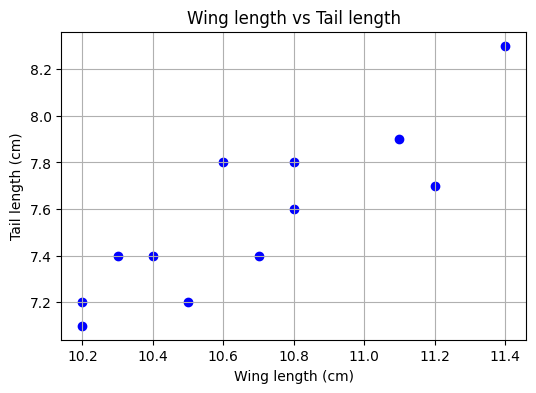

r (manual) = 0.870
r (numpy)  = 0.870
Approx SE(r) = 0.156
95% CI for r = (0.592, 0.963)
t statistic = 5.589
p-value     = 0.000231
Test H0: r=0.75 -> z = 1.085, p = 0.278
Power for r=0.5 with n=12: 0.379
Sample size for 80% power (r=0.5): 28


In [3]:
#LAST VERSION
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# ----------------- Data -----------------
wing = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
tail = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])
n = len(wing)

# 1) Plot X vs Y
plt.figure(figsize=(6,4))
plt.scatter(wing, tail, color="blue")
plt.xlabel("Wing length (cm)")
plt.ylabel("Tail length (cm)")
plt.title("Wing length vs Tail length")
plt.grid(True)
plt.show()

# 2) Correlation: manual and numpy
mean_x = np.mean(wing)
mean_y = np.mean(tail)
cov_xy = np.sum((wing - mean_x) * (tail - mean_y)) / (n - 1)
std_x = np.std(wing, ddof=1)
std_y = np.std(tail, ddof=1)
r_manual = cov_xy / (std_x * std_y)
r_numpy = np.corrcoef(wing, tail)[0, 1]

print(f"r (manual) = {r_manual:.3f}")
print(f"r (numpy)  = {r_numpy:.3f}")

# 3) Standard error and 95% CI
se_r_approx = np.sqrt((1 - r_manual**2) / (n - 2))
z = np.arctanh(r_manual)
se_z = 1.0 / np.sqrt(n - 3)
z_crit = stats.norm.ppf(0.975)
ci_z = (z - z_crit * se_z, z + z_crit * se_z)
ci_r = (np.tanh(ci_z[0]), np.tanh(ci_z[1]))

print(f"Approx SE(r) = {se_r_approx:.3f}")
print(f"95% CI for r = ({ci_r[0]:.3f}, {ci_r[1]:.3f})")

# 4) Significance test H0: r = 0
t_stat = r_manual * np.sqrt((n - 2) / (1 - r_manual**2))
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n - 2))
print(f"t statistic = {t_stat:.3f}")
print(f"p-value     = {p_value:.6f}")

# 5) Test H0: r = 0.75
r0 = 0.75
z_obs = np.arctanh(r_manual)
z_r0 = np.arctanh(r0)
z_diff = (z_obs - z_r0) / se_z
p_value_r0 = 2 * (1 - stats.norm.cdf(abs(z_diff)))
print(f"Test H0: r=0.75 -> z = {z_diff:.3f}, p = {p_value_r0:.3f}")

# 6) Power analysis (H0: r=0 vs true r=0.5)
r_alt = 0.5
df = n - 2
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df)
ncp = r_alt * np.sqrt(df / (1 - r_alt**2))
power = 1 - (stats.nct.cdf(t_crit, df, ncp) - stats.nct.cdf(-t_crit, df, ncp))
print(f"Power for r=0.5 with n={n}: {power:.3f}")

# Find sample size for 80% power
def compute_power(n_try, r, alpha=0.05):
    df_try = n_try - 2
    if df_try <= 0:
        return 0.0
    t_crit_try = stats.t.ppf(1 - alpha/2, df_try)
    ncp_try = r * np.sqrt(df_try / (1 - r**2))
    return 1 - (stats.nct.cdf(t_crit_try, df_try, ncp_try) - stats.nct.cdf(-t_crit_try, df_try, ncp_try))

target_power = 0.8
sample_size = None
for n_try in range(4, 1000):
    if compute_power(n_try, r_alt, alpha) >= target_power:
        sample_size = n_try
        break

print(f"Sample size for 80% power (r=0.5): {sample_size}")
